In [1]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
#data cleaning function


def clean_me(df):
    
    #drop self text column
    df = df.drop(columns = 'selftext')
    
    #all lowercase columns
    df['title']= df['title'].str.lower()
    
    #drop dupes
    df.drop_duplicates(subset = ['title', 'author', 'subreddit'], keep='last', inplace=True)    
    
    #remove auto mod author posts 
    df = df[~(df['author']=='AutoModerator')]
    
    #change to readable time
    df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
    
    #okenize
    tokenizer = RegexpTokenizer("\w+")
    df['title'] = df.apply(lambda row: ' '.join(tokenizer.tokenize(row['title'])), axis=1)
    
    #remove entries with links
    df = df[~(df['title'].str.contains('https'))]
    
    #word count column
    df['title_word_count'] = [len(i.split() ) for i in df['title'].tolist() ]
    
    #character count column
    df['character_word_count'] = [len(i) for i in df['title'].tolist() ]
    
    #keep posts with greater than 2 words in title
    df = df[(df['title_word_count']>2)]
    
    #change target variable to binary
    df['subreddit'] = np.where(df['subreddit'] == 'AskWomen', 1, 0)
    
    return df


#referenced how to tokenize in new column here
#https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame

In [3]:
#read in ask women data

women = pd.read_csv('../Data/women.csv')

women.head()

,title,author,created_utc,selftext,subreddit
0,Women of Reddit when you are in a relationship...,Zealousideal-Ad1181,1627412765,NaN,AskWomen
1,Do you have a hot take? What is it?,thats_riddikulus,1627411895,NaN,AskWomen
2,Why do you cry so much over little things?,kilmeplease666,1627411794,And why are you so open about crying?,AskWomen
3,"As an adult, how do you make more female friends?",shesagoodfella,1627410790,Just curious if you made good friends later in...,AskWomen
4,Which 3rd party Reddit app do you use and what...,Querious_George,1627410402,NaN,AskWomen


In [4]:
#apply cleaning function to dataset

women = clean_me(women)

In [5]:
women.shape

(45353, 6)

In [6]:
women.head()

,title,author,created_utc,subreddit,title_word_count,character_word_count
0,women of reddit when you are in a relationship...,Zealousideal-Ad1181,2021-07-27 19:06:05,1,26,130
1,do you have a hot take what is it,thats_riddikulus,2021-07-27 18:51:35,1,9,33
2,why do you cry so much over little things,kilmeplease666,2021-07-27 18:49:54,1,9,41
3,as an adult how do you make more female friends,shesagoodfella,2021-07-27 18:33:10,1,10,47
4,which 3rd party reddit app do you use and what...,Querious_George,2021-07-27 18:26:42,1,20,94


In [7]:
women = women.iloc[ 0:45000, : ]

In [8]:
women.shape

(45000, 6)

In [9]:
#read in ask men data

men = pd.read_csv('../Data/men.csv')

men.head()

,title,author,created_utc,selftext,subreddit
0,With a girl that you are interested in after a...,throwawayschoollllhw,1627412666,Both late 20s. Went on date with guy and he wa...,AskMen
1,Why are younger men getting erectile dysfuncti...,BlueMountainDace,1627412287,NaN,AskMen
2,What would you do if you did a DNA test and an...,MalekethsGhost,1627411817,"I mean we all joke ""that I know of"" when asked...",AskMen
3,What are you’re deepest darkest fantasies?,FamousEscape2981,1627411654,NaN,AskMen
4,What do you find sexy about a women ?,FamousEscape2981,1627411586,NaN,AskMen


In [10]:
#apply cleaning function to dataset

men = clean_me(men)

In [11]:
men.head()

,title,author,created_utc,subreddit,title_word_count,character_word_count
0,with a girl that you are interested in after a...,throwawayschoollllhw,2021-07-27 19:04:26,0,25,108
1,why are younger men getting erectile dysfuncti...,BlueMountainDace,2021-07-27 18:58:07,0,9,59
2,what would you do if you did a dna test and an...,MalekethsGhost,2021-07-27 18:50:17,0,16,70
3,what are you re deepest darkest fantasies,FamousEscape2981,2021-07-27 18:47:34,0,7,41
4,what do you find sexy about a women,FamousEscape2981,2021-07-27 18:46:26,0,8,35


In [12]:
men.shape

(50267, 6)

In [13]:
men = men.iloc[ 0:45000 : ]

In [14]:
men.shape

(45000, 6)

In [39]:
#create combine df with completely balanced classes

In [15]:
#create full df with balanced classes (45_000 posts in each)

df = pd.concat([women, men])

In [16]:
df.head()

,title,author,created_utc,subreddit,title_word_count,character_word_count
0,women of reddit when you are in a relationship...,Zealousideal-Ad1181,2021-07-27 19:06:05,1,26,130
1,do you have a hot take what is it,thats_riddikulus,2021-07-27 18:51:35,1,9,33
2,why do you cry so much over little things,kilmeplease666,2021-07-27 18:49:54,1,9,41
3,as an adult how do you make more female friends,shesagoodfella,2021-07-27 18:33:10,1,10,47
4,which 3rd party reddit app do you use and what...,Querious_George,2021-07-27 18:26:42,1,20,94


In [17]:
df.shape

(90000, 6)

In [18]:
#export cleaned data to put in model

clean = df.drop(columns=['author', 'created_utc', 'title_word_count', 'character_word_count'])

In [19]:
clean.head()

,title,subreddit
0,women of reddit when you are in a relationship...,1
1,do you have a hot take what is it,1
2,why do you cry so much over little things,1
3,as an adult how do you make more female friends,1
4,which 3rd party reddit app do you use and what...,1


In [61]:
clean.to_csv('../Data/cleaned.csv', index=False)

In [ ]:
#visualizations below

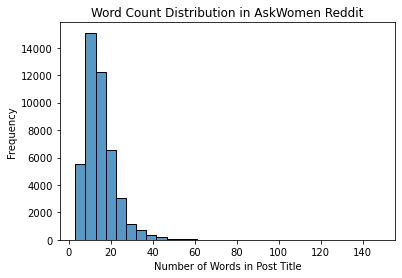

In [63]:
#histogram of word count in title

sns.histplot(data=women, x='title_word_count', bins=30);
plt.title('Word Count Distribution in AskWomen Reddit')
plt.xlabel('Number of Words in Post Title')
plt.ylabel('Frequency');

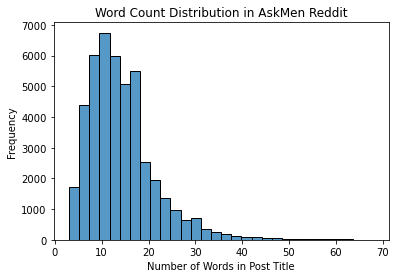

In [64]:
#histogram of word count in title

sns.histplot(data=men, x='title_word_count', bins=30);
plt.title('Word Count Distribution in AskMen Reddit')
plt.xlabel('Number of Words in Post Title')
plt.ylabel('Frequency');

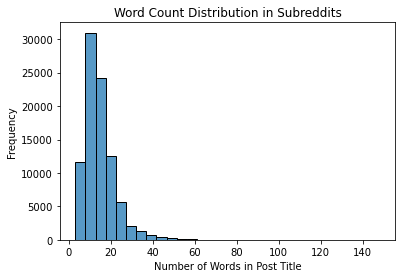

In [20]:
#histogram of word count in title

sns.histplot(data=df, x='title_word_count', bins=30);
plt.title('Word Count Distribution in Subreddits')
plt.xlabel('Number of Words in Post Title')
plt.ylabel('Frequency');

In [ ]:
#word frequency distributions for women and men datasets

In [83]:
cvec = CountVectorizer(stop_words='english', max_features=1000)

In [84]:
cvec.fit(women['title'])

CountVectorizer(max_features=1000, stop_words='english')

In [85]:
transformed = cvec.transform(women['title'])

In [86]:
transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

In [87]:
transformed_df.sum().sort_values(ascending=False).head(20)

women           9558
did             5573
like            3540
feel            3057
reddit          2599
men             2535
ladies          2281
think           2131
relationship    2070
does            1942
guy             1829
man             1746
life            1728
partner         1716
ve              1431
make            1416
woman           1357
best            1342
time            1342
sex             1276
dtype: int64

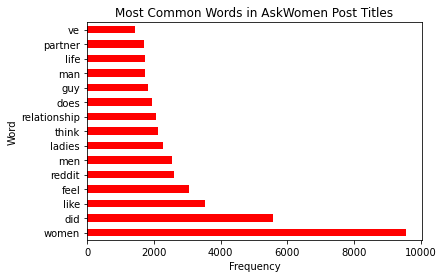

In [91]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh',color='red');
plt.title('Most Common Words in AskWomen Post Titles')
plt.xlabel('Frequency')
plt.ylabel('Word');

In [92]:
cvec = CountVectorizer(stop_words='english', max_features=1000)

In [93]:
cvec.fit(men['title'])

CountVectorizer(max_features=1000, stop_words='english')

In [94]:
transformed = cvec.transform(men['title'])

In [95]:
transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

In [96]:
transformed_df.sum().sort_values(ascending=False).head(20)

men             9270
did             3963
like            3155
reddit          3099
guys            2833
women           2408
feel            2282
girl            2135
woman           2024
life            1922
does            1913
think           1664
relationship    1610
time            1569
man             1519
know            1400
make            1366
sex             1366
best            1362
dating          1312
dtype: int64

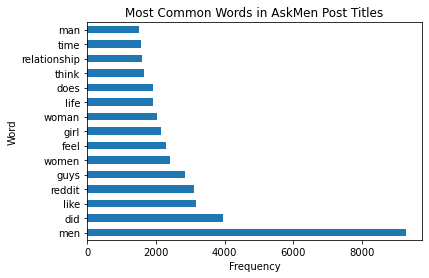

In [97]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in AskMen Post Titles')
plt.xlabel('Frequency')
plt.ylabel('Word');

In [ ]:
#word frequency distributionsfor full df

In [66]:
cvec = CountVectorizer(stop_words='english', max_features=1000)

In [67]:
cvec.fit(df['title'])

CountVectorizer(max_features=1000, stop_words='english')

In [68]:
transformed = cvec.transform(df['title'])

In [69]:
transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

In [70]:
transformed_df.sum().sort_values(ascending=False).head(20)

women           11966
men             11805
did              9536
like             6695
reddit           5698
feel             5339
guys             3889
does             3855
think            3795
relationship     3680
life             3650
woman            3381
man              3265
guy              3029
time             2911
girl             2859
partner          2824
make             2782
best             2704
ve               2685
dtype: int64

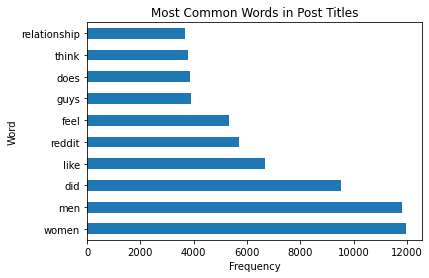

In [71]:
transformed_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');
plt.title('Most Common Words in Post Titles')
plt.xlabel('Frequency')
plt.ylabel('Word');

In [74]:
#try custom stop words

stop_words =['men', 'women', 'reddit', 'guy', 'guys', 'woman', 'man', 'girl', 'girls', 'ladies', 'like', 'just' ,'ve']

In [75]:
stop_english = stopwords.words('english')

In [76]:
stop = stop_words + stop_english

#got the idea to combine my stop words with english stopwords here
#https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn

In [78]:
cvec = CountVectorizer(stop_words=stop, max_features=1000)

In [79]:
cvec.fit(df['title'])

CountVectorizer(max_features=1000,
                stop_words=['men', 'women', 'reddit', 'guy', 'guys', 'woman',
                            'man', 'girl', 'girls', 'ladies', 'like', 'just',
                            've', 'i', 'me', 'my', 'myself', 'we', 'our',
                            'ours', 'ourselves', 'you', "you're", "you've",
                            "you'll", "you'd", 'your', 'yours', 'yourself',
                            'yourselves', ...])

In [80]:
transformed = cvec.transform(df['title'])

In [81]:
transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

In [474]:
transformed_df.sum().sort_values(ascending=False).head(20)

would           31290
feel            22060
get             20518
ever            16494
think           15086
someone         14915
relationship    14463
sex             14214
life            11839
know            11440
time            10861
want            10517
make            10415
one             10344
best            10140
partner         10007
dating           9925
friend           9560
friends          9278
deal             8961
dtype: int64

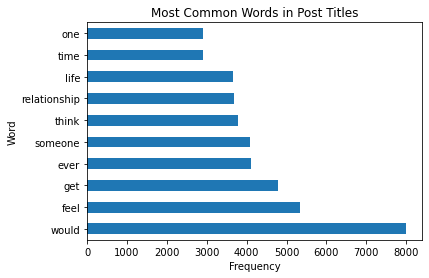

In [82]:
transformed_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');
plt.title('Most Common Words in Post Titles')
plt.xlabel('Frequency')
plt.ylabel('Word');

In [ ]:
#try only on men's and womens dfs

In [98]:
cvec = CountVectorizer(stop_words=stop, max_features=1000)

In [99]:
cvec.fit(women['title'])

CountVectorizer(max_features=1000,
                stop_words=['men', 'women', 'reddit', 'guy', 'guys', 'woman',
                            'man', 'girl', 'girls', 'ladies', 'like', 'just',
                            've', 'i', 'me', 'my', 'myself', 'we', 'our',
                            'ours', 'ourselves', 'you', "you're", "you've",
                            "you'll", "you'd", 'your', 'yours', 'yourself',
                            'yourselves', ...])

In [100]:
transformed = cvec.transform(women['title'])

In [101]:
transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

In [102]:
transformed_df.sum().sort_values(ascending=False).head(20)

would           4035
feel            3057
ever            2364
someone         2225
get             2153
think           2131
relationship    2070
life            1728
partner         1716
make            1416
one             1357
time            1342
best            1342
sex             1276
deal            1228
thing           1216
people          1214
something       1212
love            1208
dating          1200
dtype: int64

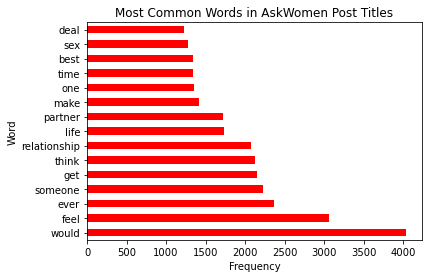

In [103]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color='red');
plt.title('Most Common Words in AskWomen Post Titles')
plt.xlabel('Frequency')
plt.ylabel('Word');

In [104]:
#ask men with custom stop

cvec = CountVectorizer(stop_words=stop, max_features=1000)

In [105]:
cvec.fit(men['title'])

CountVectorizer(max_features=1000,
                stop_words=['men', 'women', 'reddit', 'guy', 'guys', 'woman',
                            'man', 'girl', 'girls', 'ladies', 'like', 'just',
                            've', 'i', 'me', 'my', 'myself', 'we', 'our',
                            'ours', 'ourselves', 'you', "you're", "you've",
                            "you'll", "you'd", 'your', 'yours', 'yourself',
                            'yourselves', ...])

In [106]:
transformed = cvec.transform(men['title'])

In [107]:
transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

In [108]:
transformed_df.sum().sort_values(ascending=False).head(20)

would           3959
get             2643
feel            2282
life            1922
someone         1848
ever            1755
think           1664
relationship    1610
time            1569
one             1544
know            1400
sex             1366
make            1366
best            1362
dating          1312
deal            1282
people          1264
friends         1215
want            1200
thing           1170
dtype: int64

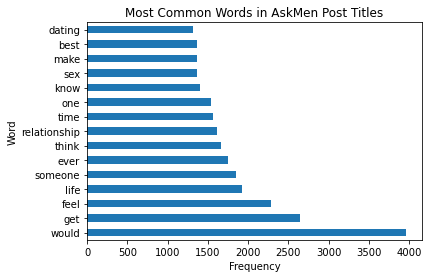

In [109]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in AskMen Post Titles')
plt.xlabel('Frequency')
plt.ylabel('Word');

In [83]:
#try with bigram

cvec = CountVectorizer(stop_words='english', ngram_range=(2,2), max_features=1000)

In [84]:
cvec.fit(df['title'])

CountVectorizer(max_features=1000, ngram_range=(2, 2), stop_words='english')

In [85]:
transformed_bigram = cvec.transform(df['title'])

In [86]:
transformed_bigram_df = pd.DataFrame(transformed_bigram.todense(),
                          columns = cvec.get_feature_names())

In [87]:
transformed_bigram_df.sum().sort_values(ascending=False).head(20)

men reddit       2641
women reddit     1989
feel like         769
long term         398
does mean         387
best way          386
make feel         374
social media      364
best friend       358
thing ve          325
year old          312
reddit did        304
look like         281
did realize       278
does feel         277
did learn         274
did feel          270
did deal          245
long did          243
ladies reddit     243
dtype: int64

In [88]:
#try with trigram

cvec = CountVectorizer(stop_words='english', ngram_range=(3,3), max_features=1000)

In [89]:
cvec.fit(df['title'])

CountVectorizer(max_features=1000, ngram_range=(3, 3), stop_words='english')

In [90]:
transformed_trigram = cvec.transform(df['title'])

In [91]:
transformed_trigram_df = pd.DataFrame(transformed_trigram.todense(),
                          columns = cvec.get_feature_names())

In [92]:
transformed_trigram_df.sum().sort_values(ascending=False).head(20)

men reddit did             139
long term relationship     134
women reddit did           114
does feel like             114
does make feel              90
women reddit feel           87
long term relationships     77
men reddit feel             74
women reddit think          70
fellow men reddit           69
men reddit does             69
low self esteem             61
did make feel               53
post nut clarity            52
men reddit deal             52
18 year old                 49
did feel like               49
dear men reddit             45
men reddit think            44
dear women reddit           43
dtype: int64

In [93]:
#try tvec

In [94]:
tvec = TfidfVectorizer(stop_words='english', max_features=1000)

In [95]:
tvec.fit(df['title'])

TfidfVectorizer(max_features=1000, stop_words='english')

In [96]:
transformed = tvec.transform(df['title'])

In [97]:
transformed_df = pd.DataFrame(transformed.todense(),
                          columns = tvec.get_feature_names())

In [98]:
transformed_df.sum().sort_values(ascending=False).head(20)

men             3286.348536
women           3276.986881
did             2683.277082
like            2181.804160
reddit          1841.037882
feel            1838.707411
think           1512.804043
guys            1406.314209
does            1349.174058
life            1298.688202
relationship    1297.978335
woman           1255.948616
man             1245.140683
guy             1123.781252
time            1109.883374
best            1102.834039
deal            1098.158460
girl            1061.818190
partner         1047.386746
thing           1035.699490
dtype: float64

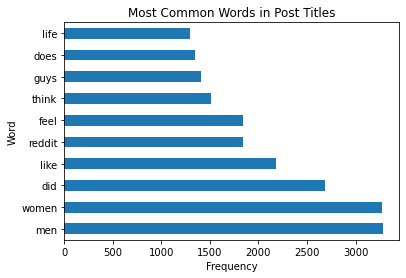

In [99]:
transformed_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');
plt.title('Most Common Words in Post Titles')
plt.xlabel('Frequency')
plt.ylabel('Word');

In [100]:
#try with stop words

tvec = TfidfVectorizer(stop_words=stop, max_features=1000)

In [101]:
tvec.fit(df['title'])

TfidfVectorizer(max_features=1000,
                stop_words=['men', 'women', 'reddit', 'guy', 'guys', 'woman',
                            'man', 'girl', 'girls', 'ladies', 'like', 'just',
                            've', 'i', 'me', 'my', 'myself', 'we', 'our',
                            'ours', 'ourselves', 'you', "you're", "you've",
                            "you'll", "you'd", 'your', 'yours', 'yourself',
                            'yourselves', ...])

In [102]:
transformed = tvec.transform(df['title'])

In [103]:
transformed_df = pd.DataFrame(transformed.todense(),
                          columns = tvec.get_feature_names())

In [104]:
transformed_df.sum().sort_values(ascending=False).head(20)

would           2297.940414
feel            1900.775400
get             1707.060830
think           1566.052738
ever            1420.964858
someone         1337.853265
relationship    1276.638003
life            1274.925782
deal            1119.047856
best            1102.358719
sex             1041.803643
time            1040.679896
make            1028.024751
partner         1023.397169
one             1013.259789
thing           1008.098236
dating           945.991913
something        909.199355
people           908.362612
love             895.420619
dtype: float64

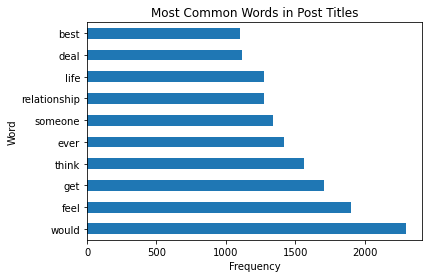

In [105]:
transformed_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');
plt.title('Most Common Words in Post Titles')
plt.xlabel('Frequency')
plt.ylabel('Word');

In [106]:
#try with bigram

tvec = TfidfVectorizer(stop_words='english', ngram_range=(2,2), max_features=1000)

In [107]:
tvec.fit(df['title'])

TfidfVectorizer(max_features=1000, ngram_range=(2, 2), stop_words='english')

In [108]:
transformed_bigram = tvec.transform(df['title'])

In [109]:
transformed_bigram_df = pd.DataFrame(transformed_bigram.todense(),
                          columns = tvec.get_feature_names())

In [110]:
transformed_bigram_df.sum().sort_values(ascending=False).head(20)

men reddit       1727.841690
women reddit     1299.450051
feel like         514.597130
best way          314.236399
does mean         305.231970
social media      303.383478
best friend       273.931776
long term         241.334859
thing ve          233.081119
make feel         229.697192
look like         226.421924
did learn         213.988274
did realize       212.360292
does feel         202.805254
year old          199.864839
reddit did        190.643667
did feel          189.894853
don know          185.688093
did deal          184.781638
ladies reddit     178.305371
dtype: float64

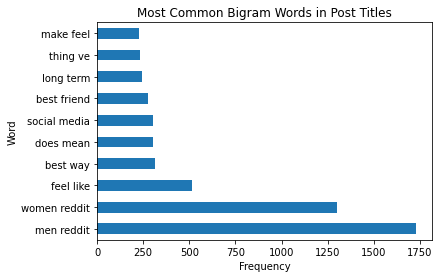

In [111]:
transformed_bigram_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');
plt.title('Most Common Bigram Words in Post Titles')
plt.xlabel('Frequency')
plt.ylabel('Word');